In [98]:
!pip install -q yfinance
!pip install pandas-datareader

In [11]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [13]:
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime

In [14]:
tech_list = ['GOOG', 'MSFT']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [15]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
company_list = [ GOOG, MSFT]
company_name = ["GOOGLE", "MICROSOFT"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-22,282.079987,282.459991,277.220001,277.750000,277.750000,25061100,MICROSOFT
2022-08-23,276.440002,278.859985,275.399994,276.440002,276.440002,17527400,MICROSOFT
2022-08-24,275.410004,277.230011,275.109985,275.790009,275.790009,18137000,MICROSOFT
2022-08-25,277.329987,279.019989,274.519989,278.850006,278.850006,16583400,MICROSOFT
2022-08-26,279.079987,280.339996,267.980011,268.089996,268.089996,27549300,MICROSOFT
2022-08-29,265.850006,267.399994,263.850006,265.230011,265.230011,20338500,MICROSOFT
2022-08-30,266.670013,267.049988,260.660004,262.970001,262.970001,22767100,MICROSOFT
2022-08-31,265.390015,267.109985,261.329987,261.470001,261.470001,24791800,MICROSOFT
2022-09-01,258.869995,260.890015,255.410004,260.399994,260.399994,23263400,MICROSOFT


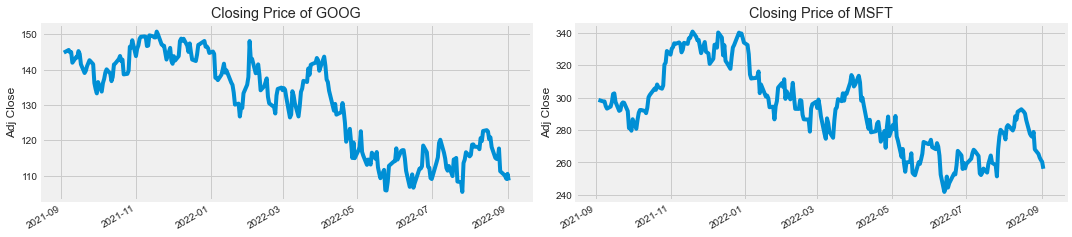

In [23]:

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

In [26]:
#moving average
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

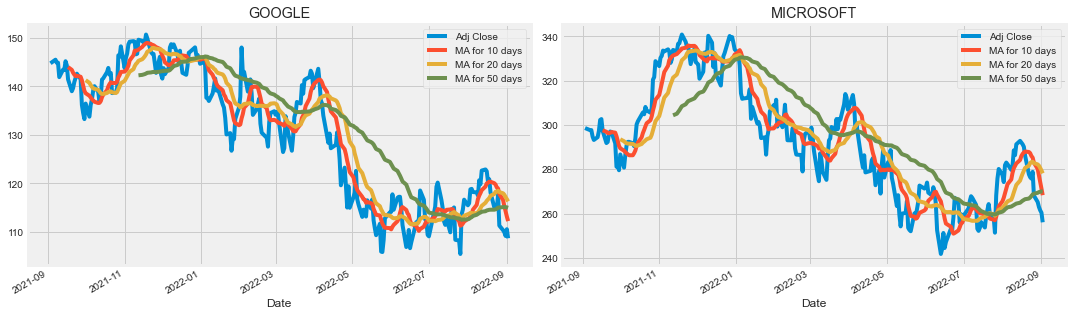

In [65]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(15)

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('MICROSOFT')
axes.flat[-1].set_visible(False)
axes.flat[-2].set_visible(False)
fig.tight_layout()

In [42]:
#THE DAILY RETURN OF THE STOCKS ON AVERAGE
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

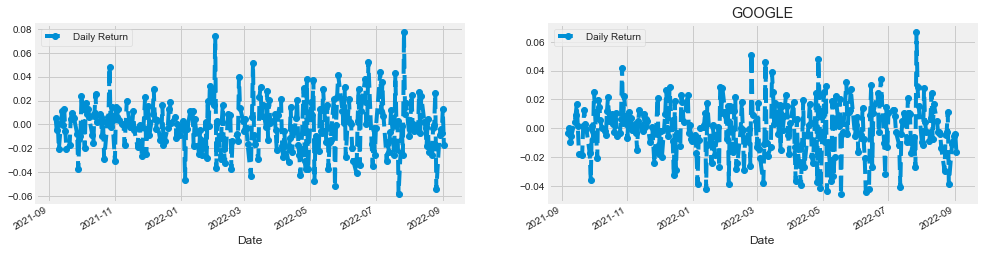

In [69]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(15)
GOOG['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')
axes.flat[-1].set_visible(False)
axes.flat[-2].set_visible(False)

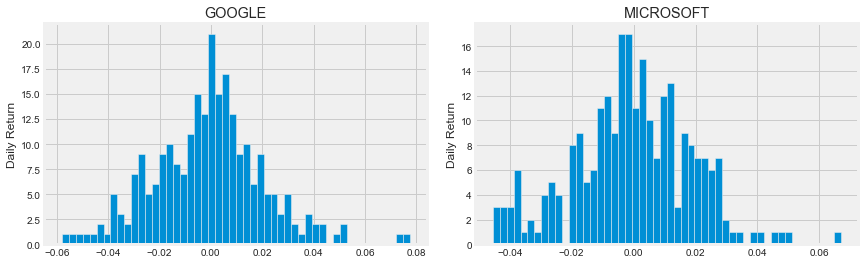

In [70]:
# THE AVERAGE DAILY RETURN
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [71]:
#CORRELATION BETWEEN STOCKS
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols,GOOG,MSFT
Date,,
2021-09-07,145.518997,297.686859
2021-09-08,144.883499,297.716583
2021-09-09,144.913498,294.781219
2021-09-10,141.921005,293.253967
2021-09-13,143.464996,294.523315


In [72]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,GOOG,MSFT
Date,,
2021-09-07,NaN,NaN
2021-09-08,-0.004367,0.000100
2021-09-09,0.000207,-0.009860
2021-09-10,-0.020650,-0.005181
2021-09-13,0.010879,0.004328


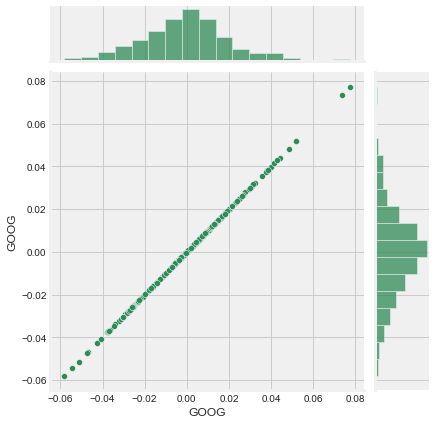

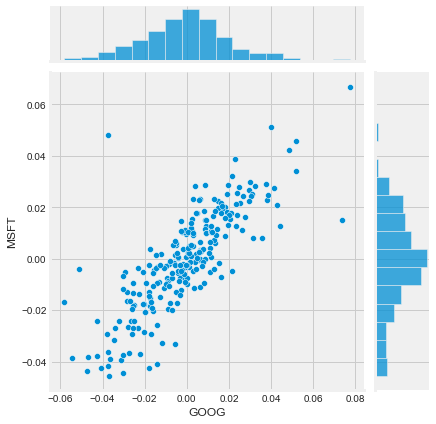

In [74]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

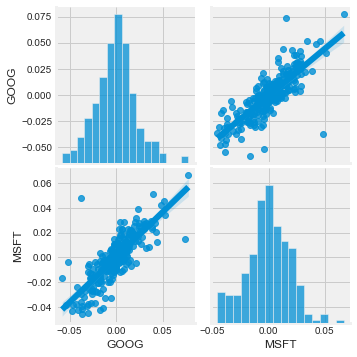

In [75]:
sns.pairplot(tech_rets, kind='reg')

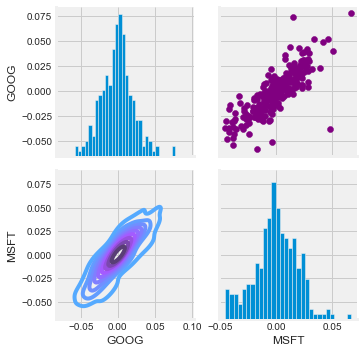

In [76]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='red')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

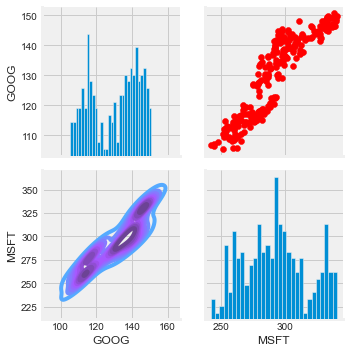

In [99]:
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='red')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

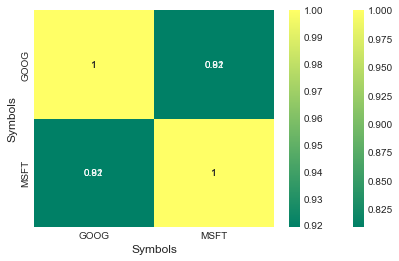

In [79]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

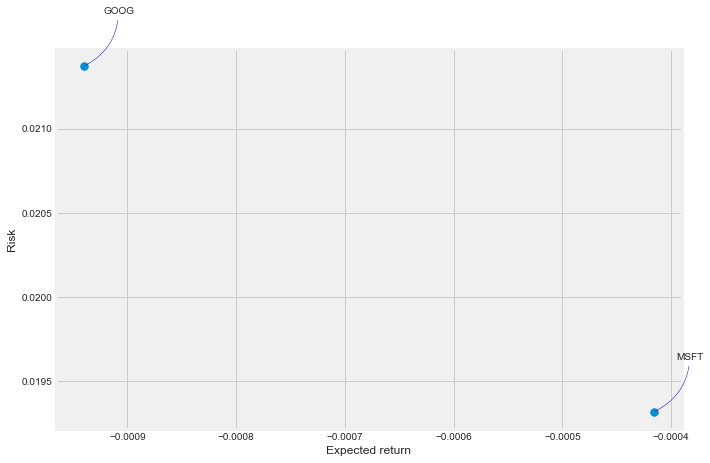

In [80]:
#value do we put at risk by investing in a particular stock
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [81]:
#Predicting the closing price stock price of MSFT
df = DataReader('MSFT', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.527193
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.033810
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.258974
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.604761
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.307220
...,...,...,...,...,...,...
2022-08-29,267.399994,263.850006,265.850006,265.230011,20338500.0,265.230011
2022-08-30,267.049988,260.660004,266.670013,262.970001,22767100.0,262.970001
2022-08-31,267.109985,261.329987,265.390015,261.470001,24791800.0,261.470001


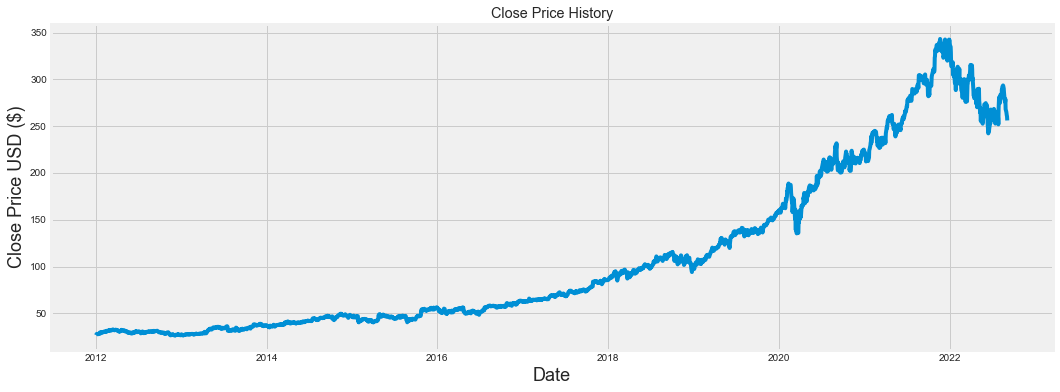

In [82]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [83]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2552

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00126286],
       [0.00325187],
       [0.00413588],
       ...,
       [0.7422492 ],
       [0.73887101],
       [0.72516893]])

In [85]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.01054492, 0.01060807, 0.00937677,
       0.01007135, 0.00988192, 0.00902948, 0.01022921, 0.00997664,
       0.01111321, 0.01130265, 0.01221822, 0.01209194, 0.01256551,
       0.01354423, 0.01389152, 0.01303908, 0.01329166, 0.01224979,
       0.01161836, 0.01553325, 0.01540696, 0.01600682, 0.0154701 ,
       0.01578582, 0.0161331 , 0.01572267, 0.0173644 , 0.01695397,
       0.01869041, 0.01802741, 0.01714339, 0.01638568, 0.01726968,
       0.0178064 , 0.01774326, 0.01790112, 0.01989012, 0.02020585,
       0.02045841, 0.01966912, 0.01840626, 0.01774326, 0.01749068,
       0.01777483, 0.0178064 , 0.01963756, 0.01941656, 0.01837469])]
[0.018153685590104426]

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.0

In [91]:
!pip install keras




  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=a815b7e8904a88fa1945d01e85d98edcfb2ce286de591ecb589dd2a71fb6b87b
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0


In [93]:
!pip install tensorflow

In [94]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2492/2492 [==============================] - 147s 56ms/step - loss: 0.0011


In [95]:
# Create the testing data set
 
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 2s 54ms/step


18.472492727019173

C:\Users\admin\AppData\Local\Temp\ipykernel_12784\3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


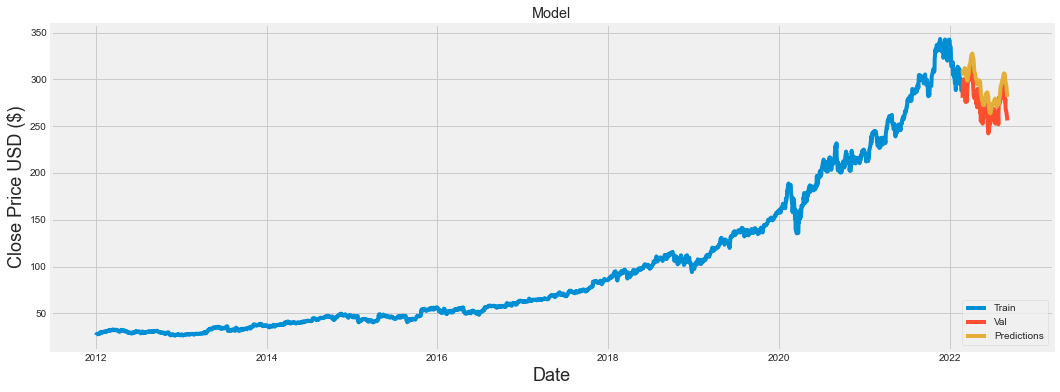

In [96]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
#in below chart we can see the prediction how its goes..

In [97]:
valid

,Close,Predictions
Date,,
2022-02-23,280.269989,309.774841
2022-02-24,294.589996,306.642487
2022-02-25,297.309998,305.977753
2022-02-28,298.790009,306.855804
2022-03-01,294.950012,308.523132
...,...,...
2022-08-29,265.230011,293.466827
2022-08-30,262.970001,290.223602
2022-08-31,261.470001,286.929718
